In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1
## Inspect the data
- Load the data
- Study the shape of the data
- Check the data for data types and missing values
- Display top 5 rows
- Study the summary statistics of the data using `describe()` and include all data types in the result

In [3]:
##### CODE HERE #####
df = pd.read_csv("nykaa_eda.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_id               252 non-null    object 
 1   product_brand_code       252 non-null    object 
 2   product_category         252 non-null    object 
 3   product_brand            252 non-null    object 
 4   product_name             252 non-null    object 
 5   product_price            252 non-null    float64
 6   product_url              252 non-null    object 
 7   productdescription       252 non-null    object 
 8   product_image_url        252 non-null    object 
 9   product_tags             252 non-null    object 
 10  product_contents         252 non-null    object 
 11  product_rating           252 non-null    float64
 12  product_reviews_count    252 non-null    int64  
 13  expected_category_count  252 non-null    int64  
 14  expected_brand_count     2

# Task 2
## Analyse product price distribution
- Plot the discrete histogram of `'product_price'` with 5 bins
- Look for trends in the distribution

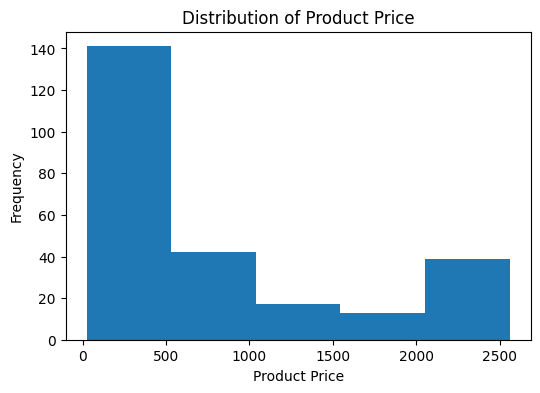

In [4]:
##### CODE HERE #####
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(df['product_price'], bins=5)
plt.xlabel('Product Price')
plt.ylabel('Frequency')
plt.title('Distribution of Product Price')
plt.show()

# Task 3
## Analyse product brand counts
- Obtain the counts of all the brands in the dataset
- Find the top 5 brands based on the count in descending order
- Create a copy of the data frame with only these identified brands
- Check the shape of the data subset that you created

In [5]:
##### CODE HERE #####
brand_counts = df['product_brand'].value_counts()
brand_counts

product_brand
BIOTIQUE         10
HIMALAYA          8
LOTUS HERBALS     8
LAKME             7
LIME CRIME        7
                 ..
DOVE              1
BLUE NECTAR       1
AXE               1
TONYMOLY          1
JOVEES            1
Name: count, Length: 119, dtype: int64

In [6]:
top5_brands = brand_counts.head(5)
top5_brands

product_brand
BIOTIQUE         10
HIMALAYA          8
LOTUS HERBALS     8
LAKME             7
LIME CRIME        7
Name: count, dtype: int64

In [7]:
top_brand_list = top5_brands.index.tolist()

df_top_brands = df[df['product_brand'].isin(top_brand_list)].copy()

In [8]:
df_top_brands.shape

(40, 17)

**Note:** From this point onwards, please use the subset data that you created in the previous step

# Task 4
## Analyse price distribution by brand
- Obtain the mean product price of each brand

In [ ]:
##### CODE HERE #####

# Task 5
## Analyse price distribution by product category
- Obtain the mean product price of each product category
- Sort the result in ascending order

In [9]:
##### CODE HERE #####
mean_price_by_category = (
    df.groupby('product_category')['product_price']
      .mean()
      .sort_values(ascending=True)
)

mean_price_by_category

product_category
personal care > hands & feet > hand sanitizer      25.000
skin > body care > soaps                           32.000
mom & baby > baby care > wipes & buds              44.000
natural > makeup > lip balm & gloss                48.000
natural > trending searches > peppermint oil       51.000
                                                   ...   
makeup > face > bb & cc cream                    2558.125
nykaa luxe > makeup > lips > lipstick            2558.125
makeup > eyes > eye brow enhancers               2558.125
hair > shop by hair type > straight              2558.125
skin > shop by concern > sun protection          2558.125
Name: product_price, Length: 121, dtype: float64

# Task 6
## Analyse product ratings by presence of reviews
- Obtain the mean product ratings for products that have at least one review and those that have no reviews

In [10]:
##### CODE HERE #####
df.groupby('has_reviews')['product_rating'].mean()

has_reviews
no     4.459091
yes    4.273913
Name: product_rating, dtype: float64

# Task 7
## Analyse product prices by presence of reviews
- Obtain the mean product prices for products that have at least one review and those that have no reviews

In [11]:
##### CODE HERE #####
df.groupby('has_reviews')['product_price'].mean()


has_reviews
no     1011.329545
yes     775.644022
Name: product_price, dtype: float64

**Note:** For tasks that require you to compute natural logarithms, please use the `log1p` function from `numpy`

# Task 8
## Analyse relation between review counts and ratings
- Plot a scatter plot between `'product_reviews_count'` and `'product_rating'`
- Plot another scatter plot between natural logarithm of `'product_reviews_count'` and `'product_rating'`

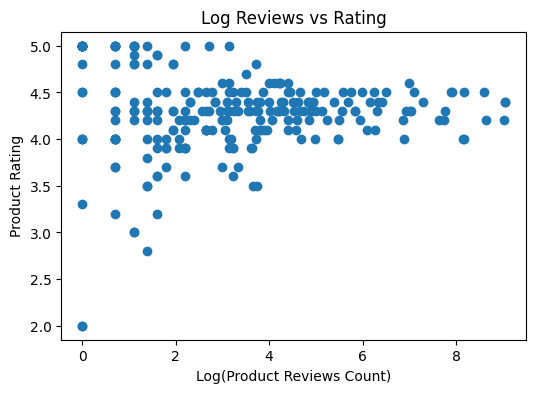

In [12]:
##### CODE HERE #####
plt.figure(figsize=(6,4))
plt.scatter(np.log1p(df['product_reviews_count']), df['product_rating'])
plt.xlabel('Log(Product Reviews Count)')
plt.ylabel('Product Rating')
plt.title('Log Reviews vs Rating')
plt.show()

# Task 9
## Analyse relation between product ratings and price
- Plot a scatter plot between `'product_rating'` and `'product_price'`
- Plot another scatter plot between `'product_rating'` and natural logarithm of `'product_price'`
- Plot a regression plot using `regplot` from `seaborn` between `'product_rating'` and natural logarithm of `'product_price'`

In [ ]:
##### CODE HERE #####

# Task 10
## Analyse relation between review counts, ratings, and brand
- Plot a scatter plot between natural logarithm of `'product_reviews_count'` and `'product_rating'` and set hue as `'product_brand'`
- Plot a regression plot using `regplot` from `seaborn` between natural logarithm of `'product_reviews_count'` and `'product_rating'` only for the brand `'LIME CRIME'`
- Plot another regression plot using `regplot` from `seaborn` between natural logarithm of `'product_reviews_count'` and `'product_rating'` only for the brand `'LAKME'`

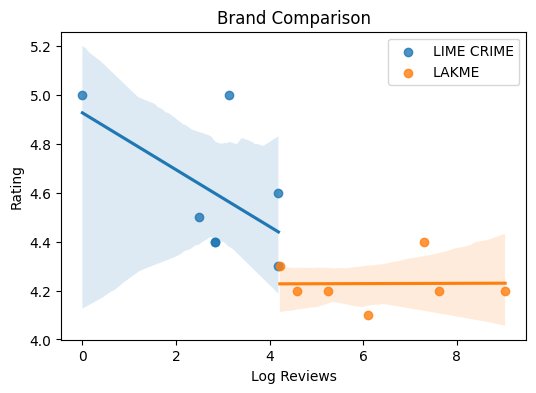

In [13]:
##### CODE HERE #####
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

brands = ['LIME CRIME', 'LAKME']
subset = df[df['product_brand'].isin(brands)]

plt.figure(figsize=(6,4))
sns.regplot(
    x=np.log1p(subset[subset['product_brand']=='LIME CRIME']['product_reviews_count']),
    y=subset[subset['product_brand']=='LIME CRIME']['product_rating'],
    label='LIME CRIME'
)

sns.regplot(
    x=np.log1p(subset[subset['product_brand']=='LAKME']['product_reviews_count']),
    y=subset[subset['product_brand']=='LAKME']['product_rating'],
    label='LAKME'
)

plt.legend()
plt.xlabel('Log Reviews')
plt.ylabel('Rating')
plt.title('Brand Comparison')
plt.show()

# Task 11
## Analyse relation between ratings, price, and brand
- Plot a scatter plot between `'product_rating'` and `'product_price'` and set hue as `'product_brand'`
- Plot a scatter plot between `'product_rating'` and natural logarithm of `'product_price'` and set hue as `'product_brand'`
- Plot a regression plot using `regplot` from `seaborn` between `'product_rating'` and natural logarithm of `'product_price'` only for the brand `'HIMALAYA'`
- Plot a regression plot using `regplot` from `seaborn` between `'product_rating'` and natural logarithm of `'product_price'` only for the brand `'LIME CRIME'`

In [ ]:
##### CODE HERE #####